# predicting the profit of the Super store

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 #I 've made some changes

In [2]:
data = pd.read_csv(r'Superstore.csv' , engine='python')
data = data.drop(['Row ID' , 'Order ID' , 'Ship Date' , 'Customer ID' , 'City' ,'Postal Code' , 
                  'Order Date','Product ID' , 'Product Name','State' , 'Customer Name' , 'Country'] ,axis =1)

data

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
data.loc[: , 'Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [4]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Region        9994 non-null   object 
 3   Category      9994 non-null   object 
 4   Sub-Category  9994 non-null   object 
 5   Sales         9994 non-null   float64
 6   Quantity      9994 non-null   int64  
 7   Discount      9994 non-null   float64
 8   Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 702.8+ KB


In [6]:
data.dtypes

Ship Mode        object
Segment          object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
df = pd.DataFrame(data.groupby('Ship Mode')['Profit'].mean())
df.sort_values(by = 'Profit' , ascending = False)

,Profit
Ship Mode,
First Class,31.839948
Second Class,29.535545
Same Day,29.266591
Standard Class,27.494770


In [8]:
df1 = pd.DataFrame(data.groupby('Category')['Profit'].mean())
df1.sort_values(by = 'Profit' , ascending = False)

,Profit
Category,
Technology,78.752002
Office Supplies,20.327050
Furniture,8.699327


In [9]:
data.groupby('Category').describe()

Sales                                                   \
                  count        mean          std    min     25%      50%   
Category                                                                   
Furniture        2121.0  349.834887   503.179145  1.892  47.040  182.220   
Office Supplies  6026.0  119.324101   382.182228  0.444  11.760   27.418   
Technology       1847.0  452.709276  1108.655848  0.990  68.016  166.160   

                                    Quantity            ... Discount       \
                     75%        max    count      mean  ...      75%  max   
Category                                                ...                 
Furniture        435.168   4416.174   2121.0  3.785007  ...      0.3  0.7   
Office Supplies   79.920   9892.740   6026.0  3.801195  ...      0.2  0.8   
Technology       448.534  22638.480   1847.0  3.756903  ...      0.2  0.7   

                 Profit                                                       \
                  count       mean         std        min       25%      50%   
Category                                                                       
Furniture        2121.0   8.699327  136.049246 -1862.3124 -12.84900   7.7748   
Office Supplies  6026.0  20.327050  164.887280 -3701.8928   2.10150   6.8824   
Technology       1847.0  78.752002  428.816633 -6599.9780   5.20365  25.0182   

                                    
                     75%       max  
Category                            
Furniture        33.7266  1013.127  
Office Supplies  19.4163  4946.370  
Technology       74.8946  8399.976  

[3 rows x 32 columns]

In [10]:
df1 = pd.DataFrame(data.groupby('Category')['Quantity'].mean())
df1.sort_values(by = 'Quantity' , ascending = False)

,Quantity
Category,
Office Supplies,3.801195
Furniture,3.785007
Technology,3.756903


In [11]:
df2 = pd.DataFrame(data.groupby('Segment')['Quantity'].mean())
df2.sort_values(by = 'Quantity' , ascending = False)

,Quantity
Segment,
Corporate,3.843709
Home Office,3.782389
Consumer,3.760547


In [12]:
df2 = pd.DataFrame(data.groupby('Segment')['Sales'].mean())
df2.sort_values(by = 'Sales' , ascending = False)

,Sales
Segment,
Home Office,240.972041
Corporate,233.823300
Consumer,223.733644


In [13]:
data.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [14]:
df3 = pd.DataFrame(data.groupby('Region')['Sales'].mean())

df3.sort_values(by = 'Sales' ,  ascending = False)


,Sales
Region,
South,241.803645
East,238.336110
West,226.493233
Central,215.772661


In [15]:
df4 = pd.DataFrame(data.groupby('Region')['Profit'].mean())

df4.sort_values(by = 'Profit' ,  ascending = False)

,Profit
Region,
West,33.849032
East,32.135808
South,28.857673
Central,17.092709


In [16]:
df5 = pd.DataFrame(data.groupby('Ship Mode')['Discount'].mean())  #which ship mode give us more discount \


df5.sort_values(by = 'Discount' , ascending = False)

,Discount
Ship Mode,
First Class,0.164610
Standard Class,0.160023
Same Day,0.152394
Second Class,0.138895


In [17]:
df5 = pd.DataFrame(data.groupby('Category')['Discount'].mean())  #which ship mode give us more discount \


df5.sort_values(by = 'Discount' , ascending = False)

,Discount
Category,
Furniture,0.173923
Office Supplies,0.157285
Technology,0.132323


In [18]:
df2 = pd.DataFrame(data.groupby('Category')['Sales'].std())       #technology has high variance in sells
df2.sort_values(by = 'Sales' , ascending = False)

,Sales
Category,
Technology,1108.655848
Furniture,503.179145
Office Supplies,382.182228


In [19]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


# EDA (exploratory Data Analysis )

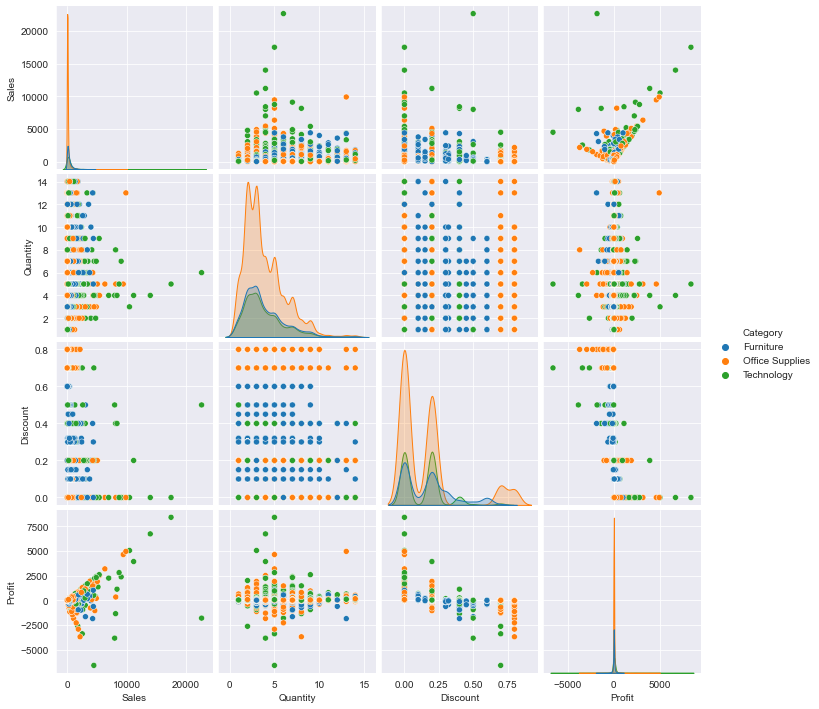

In [20]:
sns.set_style('darkgrid' , {"xtick.major.size":13, "ytick.major.size": 13})

sns.pairplot(data , hue = 'Category' , dropna = True)

Can we say that when the **quantity** and **profit** have `correlation` we each other?

No

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

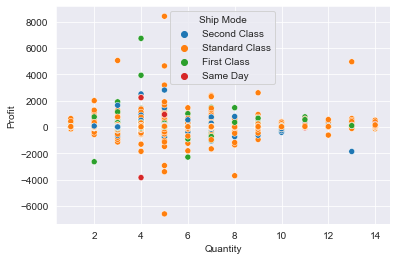

In [21]:
sns.scatterplot(x = 'Quantity' , y = 'Profit' , data = data , hue = 'Ship Mode')




ir's clear that The more we can sell the more we have profit 

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

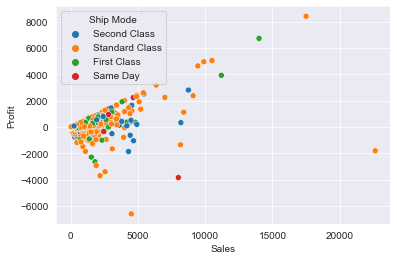

In [22]:
sns.scatterplot(x = 'Sales' , y = 'Profit' , data = data , hue = 'Ship Mode')

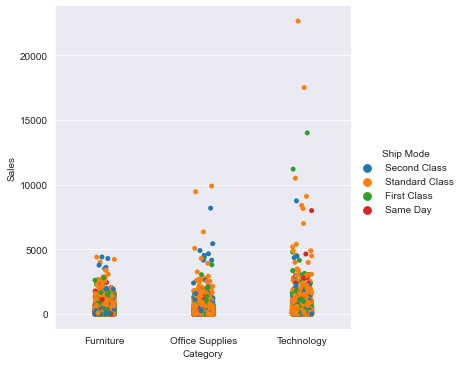

In [23]:
sns.catplot(x= 'Category' , y = 'Sales' , hue = 'Ship Mode' , data  = data , kind = 'strip')



# Data prepration 

## data preprocessing

### handle cat

In [24]:
data

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [33]:
data.columns

Index(['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [37]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()

ship = ordinal.fit_transform(data[['Ship Mode']])
Segment = ordinal.fit_transform(data[['Segment']])
Region = ordinal.fit_transform(data[['Region']])
Sub_Category = ordinal.fit_transform(data[['Sub-Category']])
category =  ordinal.fit_transform(data[['Category']])

In [38]:
data1 = data.drop(['Ship Mode'  , 'Segment' , 'Region' , 'Sub-Category' , 'Category'] , axis = 1)
data1

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164
...,...,...,...,...
9989,25.2480,3,0.20,4.1028
9990,91.9600,2,0.00,15.6332
9991,258.5760,2,0.20,19.3932
9992,29.6000,4,0.00,13.3200


In [61]:
data2 = np.concatenate([ ship , Segment , Region ,Sub_Category , category] , axis = 1 )

data2 = pd.DataFrame(data2 , columns = ['ship' , 'segment' , 'region' , 'sub' , 'category'])

data3 = pd.concat([data2 , data1] , axis = 1)
data3

,ship,segment,region,sub,category,Sales,Quantity,Discount,Profit
0,2.0,0.0,2.0,4.0,0.0,261.9600,2,0.00,41.9136
1,2.0,0.0,2.0,5.0,0.0,731.9400,3,0.00,219.5820
2,2.0,1.0,3.0,10.0,1.0,14.6200,2,0.00,6.8714
3,3.0,0.0,2.0,16.0,0.0,957.5775,5,0.45,-383.0310
4,3.0,0.0,2.0,14.0,1.0,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...
9989,2.0,0.0,2.0,9.0,0.0,25.2480,3,0.20,4.1028
9990,3.0,0.0,3.0,9.0,0.0,91.9600,2,0.00,15.6332
9991,3.0,0.0,3.0,13.0,2.0,258.5760,2,0.20,19.3932
9992,3.0,0.0,3.0,12.0,1.0,29.6000,4,0.00,13.3200


### handle missing

In [63]:
data3.isnull().sum()

ship        0
segment     0
region      0
sub         0
category    0
Sales       0
Quantity    0
Discount    0
Profit      0
dtype: int64

### handle duplicated

In [68]:
data3.duplicated().sum()

277

In [71]:
data4 = data3.drop_duplicates(keep = 'first')
data4

,ship,segment,region,sub,category,Sales,Quantity,Discount,Profit
0,2.0,0.0,2.0,4.0,0.0,261.9600,2,0.00,41.9136
1,2.0,0.0,2.0,5.0,0.0,731.9400,3,0.00,219.5820
2,2.0,1.0,3.0,10.0,1.0,14.6200,2,0.00,6.8714
3,3.0,0.0,2.0,16.0,0.0,957.5775,5,0.45,-383.0310
4,3.0,0.0,2.0,14.0,1.0,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...
9989,2.0,0.0,2.0,9.0,0.0,25.2480,3,0.20,4.1028
9990,3.0,0.0,3.0,9.0,0.0,91.9600,2,0.00,15.6332
9991,3.0,0.0,3.0,13.0,2.0,258.5760,2,0.20,19.3932
9992,3.0,0.0,3.0,12.0,1.0,29.6000,4,0.00,13.3200


### handle outliers

<AxesSubplot:>

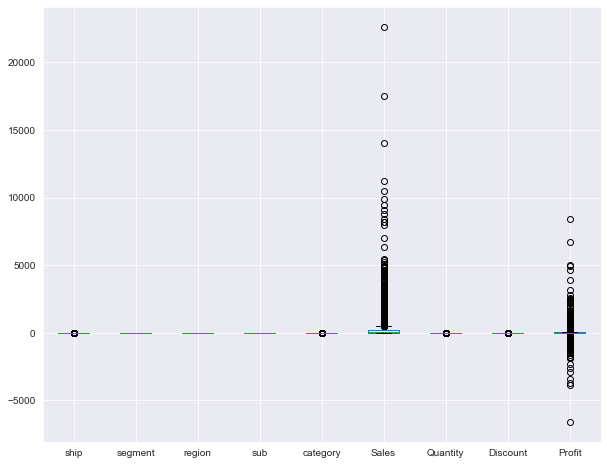

In [78]:
plt.figure(figsize = (10 , 8))

data4.boxplot(fontsize =10 )

In [81]:
Q1 = data4['Sales'].quantile(0.25)
Q3 = data4['Sales'].quantile(0.75)

Lb = Q1 - 1.5 * (Q3 - Q1)
Ub = Q3 + 1.5 * (Q3 - Q1)


print(Lb)
print(Ub)

-274.395
504.04499999999996


In [89]:
data4[data4['Sales'] > 504.04499999999996]

,ship,segment,region,sub,category,Sales,Quantity,Discount,Profit
1,2.0,0.0,2.0,5.0,0.0,731.9400,3,0.00,219.5820
3,3.0,0.0,2.0,16.0,0.0,957.5775,5,0.45,-383.0310
7,3.0,0.0,3.0,13.0,2.0,907.1520,6,0.20,90.7152
10,3.0,0.0,3.0,16.0,0.0,1706.1840,9,0.20,85.3092
11,3.0,0.0,3.0,13.0,2.0,911.4240,4,0.20,68.3568
...,...,...,...,...,...,...,...,...,...
9931,3.0,0.0,3.0,4.0,0.0,683.3320,4,0.15,-40.1960
9942,3.0,0.0,3.0,14.0,1.0,998.8200,9,0.00,29.9646
9947,2.0,1.0,0.0,5.0,0.0,1925.8800,6,0.00,539.2464
9948,2.0,1.0,0.0,1.0,1.0,2405.2000,8,0.00,793.7160


In [116]:
X = data4.iloc[: , :-1].reset_index().drop('index' , axis= 1)
y = data4.iloc[: , -1]



## Normalization

In [117]:
from sklearn.preprocessing import MinMaxScaler


mm = MinMaxScaler()

sale = mm.fit_transform(data4.Sales.values.reshape(-1 , 1))

sale_df = pd.DataFrame(sale , columns = ['Sale'])



In [118]:
data5 = pd.concat( [X , sale_df ] , axis= 1).reset_index()
data5

,index,ship,segment,region,sub,category,Sales,Quantity,Discount,Sale
0,0,2.0,0.0,2.0,4.0,0.0,261.9600,2,0.00,0.011552
1,1,2.0,0.0,2.0,5.0,0.0,731.9400,3,0.00,0.032313
2,2,2.0,1.0,3.0,10.0,1.0,14.6200,2,0.00,0.000626
3,3,3.0,0.0,2.0,16.0,0.0,957.5775,5,0.45,0.042280
4,4,3.0,0.0,2.0,14.0,1.0,22.3680,2,0.20,0.000968
...,...,...,...,...,...,...,...,...,...,...
9712,9712,2.0,0.0,2.0,9.0,0.0,25.2480,3,0.20,0.001096
9713,9713,3.0,0.0,3.0,9.0,0.0,91.9600,2,0.00,0.004043
9714,9714,3.0,0.0,3.0,13.0,2.0,258.5760,2,0.20,0.011403
9715,9715,3.0,0.0,3.0,12.0,1.0,29.6000,4,0.00,0.001288


# split the data into train and test


In [125]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split( X , y , random_state = 42  )


# train the model

In [137]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(criterion='mse' ,random_state=2 ,  n_estimators=200 , max_depth = 6)

model.fit(X_train ,  y_train )


RandomForestRegressor(max_depth=6, n_estimators=200, random_state=2)

In [138]:
y_pred = model.predict(X_test)
y_pred

array([15.18405424,  7.86418533, 30.37395094, ...,  7.92198246,
       24.32369602,  9.04974974])

# evaluation

In [139]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred , y_test)


34.9431267566699

# check overfitting

In [140]:
y_pred_train = model.predict(X_train)

In [141]:
mean_absolute_error(y_pred_train , y_train)

24.993453285480733